In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

# Reading Dataset

In [54]:
df = pd.read_csv("Copy of loan.csv")

In [55]:
df.shape

(614, 13)

In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [57]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Cleaning

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [61]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

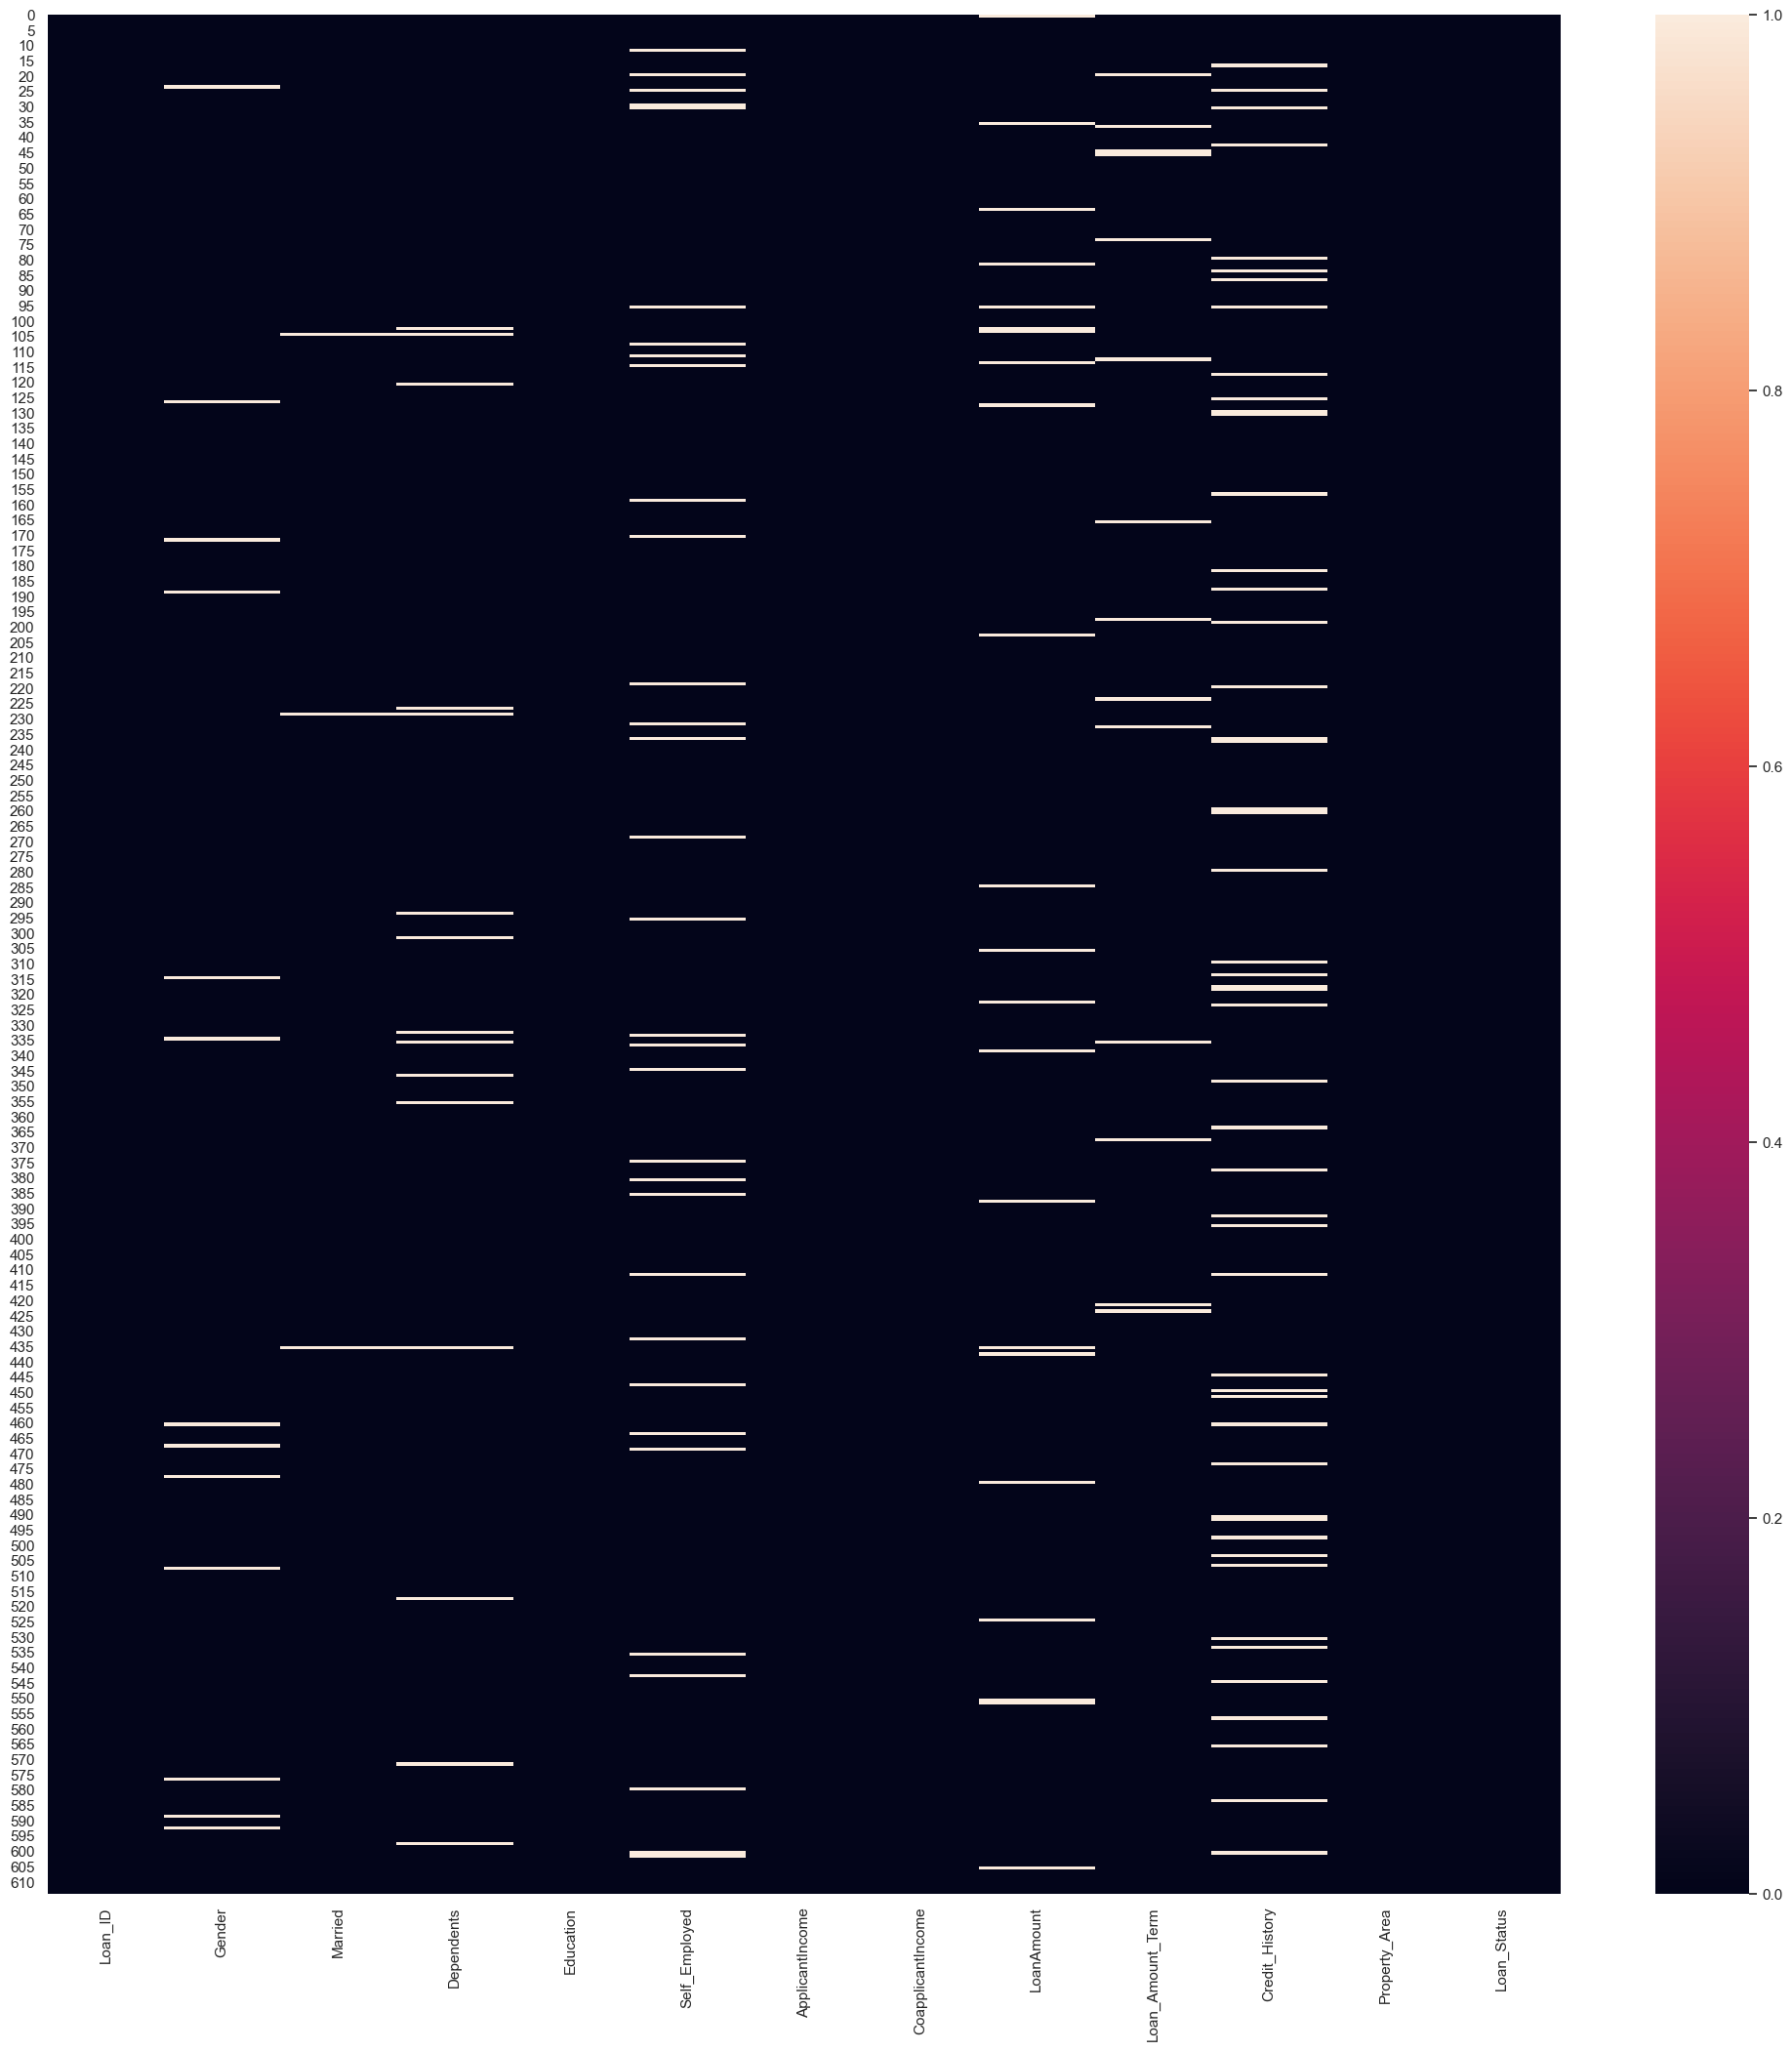

In [62]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [63]:
null_var = df.isnull().sum()/df.shape[0] *100
null_var

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Numeric values filling

In [64]:
df2_num=df.select_dtypes(include=['int64','float64'])
df2_num.shape

(614, 5)

In [65]:
df2_num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [67]:
missing_num_var = [var for var in df2_num.columns if df2_num[var].isnull().sum()>0]
missing_num_var

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [68]:
num_var_miss = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df2_num[num_var_miss][df2_num[num_var_miss].isnull().any(axis=1)]

,LoanAmount,Loan_Amount_Term,Credit_History
0,NaN,360.0,1.0
16,100.0,240.0,NaN
19,115.0,NaN,1.0
24,151.0,360.0,NaN
30,201.0,360.0,NaN
35,NaN,360.0,1.0
36,100.0,NaN,0.0
42,75.0,360.0,NaN
44,96.0,NaN,1.0
45,88.0,NaN,1.0


C:\Users\Hammad F\AppData\Local\Temp\ipykernel_16420\4261977542.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2_num[var], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})
C:\Users\Hammad F\AppData\Local\Temp\ipykernel_16420\4261977542.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

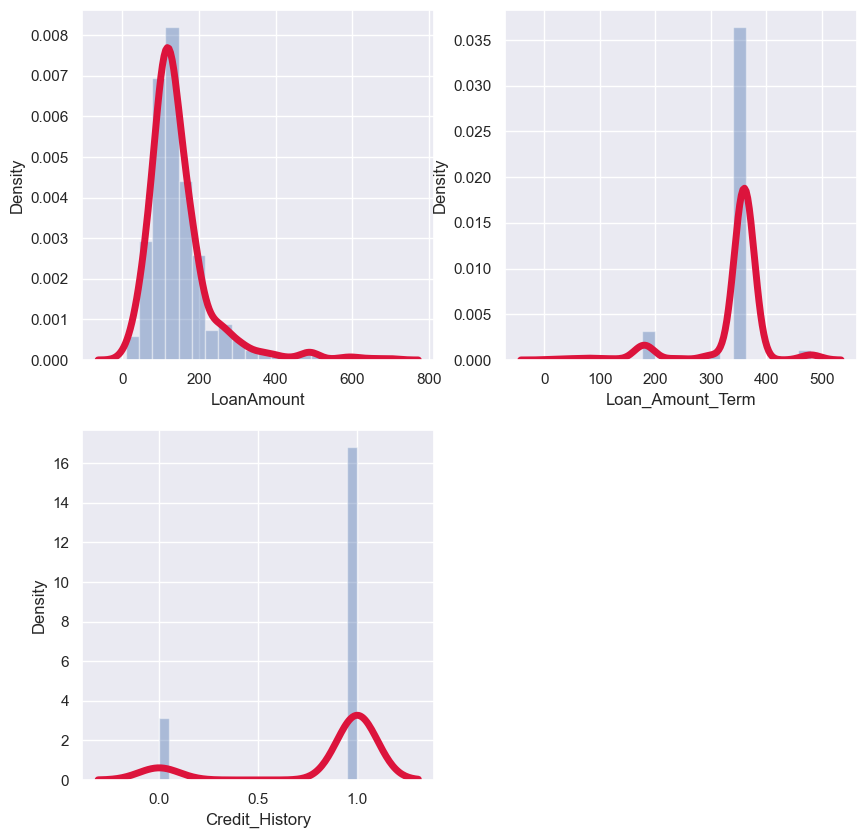

In [69]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df2_num[var], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [70]:
df2_num['LoanAmount'].fillna(df2_num['LoanAmount'].mean(), inplace=True)

In [27]:
df2_num['Loan_Amount_Term'].fillna(df2_num['Loan_Amount_Term'].mode(), inplace=True)

In [71]:
df2_num['Loan_Amount_Term'].fillna(df2_num['Loan_Amount_Term'].mode().iloc[0], inplace=True)

In [33]:
df2_num['Credit_History'].fillna(df2_num['Credit_History'].mode(), inplace=True)

In [72]:
df2_num['Credit_History'].fillna(df2_num['Credit_History'].mode().iloc[0], inplace=True)

In [73]:
missing_num_var = [var for var in df2_num.columns if df2_num[var].isnull().sum()>0]
missing_num_var

[]

In [74]:
df2_num.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# Catagorical values filling

In [75]:
df3_num=df.select_dtypes(include=['object'])
df3_num.shape

(614, 8)

In [76]:
df3_num.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [77]:
missing_cat_var = [var for var in df3_num.columns if df3_num[var].isnull().sum()>0]
missing_cat_var

['Gender', 'Married', 'Dependents', 'Self_Employed']

In [78]:
num_var_miss = ['Gender', 'Married', 'Dependents', 'Self_Employed']
df3_num[num_var_miss][df3_num[num_var_miss].isnull().any(axis=1)]

,Gender,Married,Dependents,Self_Employed
11,Male,Yes,2,NaN
19,Male,Yes,0,NaN
23,NaN,Yes,2,No
24,Male,Yes,1,NaN
29,Female,No,2,NaN
30,Male,Yes,1,NaN
95,Male,No,0,NaN
102,Male,Yes,NaN,No
104,Male,NaN,NaN,No
107,Male,No,0,NaN


In [79]:
miss_val_per = df3_num.isnull().mean()*100
miss_val_per

Loan_ID          0.000000
Gender           2.117264
Married          0.488599
Dependents       2.442997
Education        0.000000
Self_Employed    5.211726
Property_Area    0.000000
Loan_Status      0.000000
dtype: float64

In [80]:
for var in missing_cat_var:
    df3_num[var].fillna(df3_num[var].mode()[0],inplace=True)
    print(var,"=",df3_num[var].mode()[0])

Gender = Male
Married = Yes
Dependents = 0
Self_Employed = No


In [81]:
df3_num.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

# Update original dataset

In [82]:
df.update(df2_num)

In [83]:
df.update(df3_num)

In [84]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Sepration of X and Y

In [85]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [110]:
X=df.iloc[:,1:12]
Y=df.iloc[:,12]

In [99]:
X.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban


In [111]:
Y.head(4)

0    Y
1    N
2    Y
3    Y
Name: Loan_Status, dtype: object

# Encoding and Scaling

In [112]:
import sklearn.preprocessing as pre_process
import numpy as np
ordinal_encoding=pre_process.OrdinalEncoder()
standered_scalling=pre_process.StandardScaler()
one_hot=pre_process.OneHotEncoder()

from sklearn.compose import make_column_transformer
transform_x=make_column_transformer( (one_hot , ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
,(standered_scalling,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']))


processed_x=transform_x.fit_transform(X)



import numpy as np
ordinal_encoder=pre_process.OrdinalEncoder()
processed_y=ordinal_encoder.fit_transform(np.c_[Y])
processed_y

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

# Splitting Dataset

In [113]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split( processed_x , processed_y)

# Training On Single Model

In [114]:
import sklearn.svm as sv
model=sv.SVC(kernel='linear')
model.fit(train_x,train_y)

D:\Ananconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

# Performing Predictions

In [115]:
pred_y=model.predict(test_x)
pred_y

array([1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1.])

In [116]:
pred_y=model.predict(test_x)
pred_y=np.c_[pred_y]
pred_y
#pred_y=pred_y.reshape(-1,1)
#pred_y

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],

In [117]:
pred_y_Class=ordinal_encoder.inverse_transform(pred_y)
pred_y_Class
test_y_Class=ordinal_encoder.inverse_transform(test_y)
test_y_Class
test_y_Class=test_y_Class.reshape(1,-1)
pred_y_Class=pred_y_Class.reshape(1,-1)
pred_y_Class

array([['Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
        'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
        'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
        'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
        'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
        'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
        'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
        'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
        'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
        'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
        'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
        'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']],
      dtype=object)

In [118]:
pd.DataFrame({"Test":test_y_Class[0],"pred":pred_y_Class[0]})

,Test,pred
0,Y,Y
1,N,N
2,N,N
3,Y,Y
4,N,N
5,Y,Y
6,N,Y
7,N,Y
8,Y,Y
9,Y,Y


# All Available Models 

In [119]:
from sklearn.utils import all_estimators
estimators = all_estimators(type_filter='classifier') #regressor
for name, get_model in estimators:
    try:
         print(name)
    except:
         print('Unable to import', name)

AdaBoostClassifier
BaggingClassifier
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LinearSVC
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NearestCentroid
NuSVC
OneVsOneClassifier
OneVsRestClassifier
OutputCodeClassifier
PassiveAggressiveClassifier
Perceptron
QuadraticDiscriminantAnalysis
RadiusNeighborsClassifier
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC
StackingClassifier
VotingClassifier


# Training on all available models for classifier based on dataset

In [120]:
import sklearn.metrics as sm
from sklearn.utils import all_estimators
estimators = all_estimators(type_filter='classifier')
model_name=[]
model_precision=[]
for name, get_model in estimators:
    try:
        model = get_model()
        model.fit(train_x,train_y)
        pred_y=model.predict(test_x)
        model_precision.append(sm.precision_score(test_y, pred_y))
        model_name.append(name)
    except Exception as e:
        print('Unable to import', name)
        print(e)

D:\Ananconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Ananconda\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Ananconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Ananconda\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or

Unable to import CategoricalNB
Negative values in data passed to CategoricalNB (input X)
Unable to import ClassifierChain
_BaseChain.__init__() missing 1 required positional argument: 'base_estimator'
Unable to import ComplementNB
Negative values in data passed to ComplementNB (input X)


D:\Ananconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Ananconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Ananconda\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Ananconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, 

Unable to import MultiOutputClassifier
MultiOutputClassifier.__init__() missing 1 required positional argument: 'estimator'
Unable to import MultinomialNB
Negative values in data passed to MultinomialNB (input X)
Unable to import OneVsOneClassifier
OneVsOneClassifier.__init__() missing 1 required positional argument: 'estimator'
Unable to import OneVsRestClassifier
OneVsRestClassifier.__init__() missing 1 required positional argument: 'estimator'
Unable to import OutputCodeClassifier
OutputCodeClassifier.__init__() missing 1 required positional argument: 'estimator'


D:\Ananconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Ananconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Ananconda\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Ananconda\lib\site-packages\sklearn\neighbors\_classification.py:529: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._fit(X, y)


Unable to import RadiusNeighborsClassifier
No neighbors found for test samples array([  1,   2,   3,   4,   7,   9,  12,  14,  15,  16,  18,  19,  27,
        32,  33,  35,  47,  50,  53,  54,  55,  56,  58,  62,  65,  67,
        70,  74,  78,  80,  81,  86,  88,  89,  90,  96,  99, 102, 103,
       105, 110, 111, 116, 119, 120, 121, 122, 124, 125, 126, 133, 137,
       140, 147, 148, 153], dtype=int64), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.


C:\Users\Hammad F\AppData\Local\Temp\ipykernel_16420\3748595154.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x,train_y)


Unable to import StackingClassifier
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
Unable to import VotingClassifier
VotingClassifier.__init__() missing 1 required positional argument: 'estimators'


D:\Ananconda\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Ananconda\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Ananconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Ananconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

# Training reports

In [121]:
results=pd.DataFrame({"Model Name":model_name , "Model precision":model_precision})
results

,Model Name,Model precision
0,AdaBoostClassifier,0.851240
1,BaggingClassifier,0.867925
2,BernoulliNB,0.867769
3,CalibratedClassifierCV,0.868217
4,DecisionTreeClassifier,0.851485
5,DummyClassifier,0.733766
6,ExtraTreeClassifier,0.838384
7,ExtraTreesClassifier,0.866071
8,GaussianNB,0.861789
9,GaussianProcessClassifier,0.864000


# Train on best fit model

In [ ]:
import sklearn.metrics as sm
from sklearn.utils import all_estimators
estimators = all_estimators(type_filter='classifier')
model_name=[]
model_precision=[]
for name, get_model in estimators:
    if name=="NearestCentroid":
        try:
            model = get_model()
            model.fit(train_x,train_y)
            pred_y=model.predict(test_x)
            model_precision.append(sm.precision_score(test_y, pred_y))
            model_name.append(name)
        except Exception as e:
            print('Unable to import', name)
            print(e)